In [10]:
import numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from matplotlib import animation
from JSAnimation.IPython_display import display_animation

In [11]:
uvinitial = numpy.load('uvinitial.npz')
U = uvinitial['U']
V = uvinitial['V']

In [12]:
def ftcs(U, V, nt, Du, Dv, F, k, dt, dh):
    
    xy = numpy.shape(U)
    
    U_a = numpy.zeros(( 1 + nt / 100, xy[0], xy[0]))    
    
    for n in range(nt):
        
        Un = U.copy()
        Vn = V.copy()
        Lu = ( U[0:-2,1:-1] + U[1:-1,0:-2] - 4*U[1:-1,1:-1] + U[1:-1,2:] + U[2:,1:-1] )
        Lv = ( V[0:-2,1:-1] + V[1:-1,0:-2] - 4*V[1:-1,1:-1] + V[1:-1,2:] + V[2:,1:-1] )
        
        uvv = Un[1:-1,1:-1]*Vn[1:-1,1:-1]*Vn[1:-1,1:-1]*dt
        
        U[1:-1,1:-1] = Un[1:-1,1:-1] + (Du*dt/dh**2*Lu - uvv + dt*F*(1-Un[1:-1,1:-1]))
        V[1:-1,1:-1] = Vn[1:-1,1:-1] + (Dv*dt/dh**2*Lv + uvv - dt*(F+k)*Vn[1:-1,1:-1])
        
        
        # Neumann BCs
        U[-1,:] = U[-2,:]
        U[:,-1] = U[:,-2]
        V[-1,:] = V[-2,:]
        V[:,-1] = V[:,-2]
        U[0,:] = U[1,:]
        U[:,0] = U[:,1]
        V[0,:] = V[1,:]
        V[:,0] = V[:,1]
        
        if n % 100 == 0:
            U_a[n/100,:,:] = U
        
    return U, V, U_a

In [13]:
n = 192

#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.065 # Bacteria 1 
#Du, Dv, F, k = 0.00014, 0.00006, 0.035, 0.065 # Bacteria 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.060, 0.062 # Coral
Du, Dv, F, k = 0.00019, 0.00005, 0.060, 0.062 # Fingerprint
#Du, Dv, F, k = 0.00010, 0.00010, 0.018, 0.050 # Spirals
#Du, Dv, F, k = 0.00012, 0.00008, 0.020, 0.050 # Spirals Dense
#Du, Dv, F, k = 0.00010, 0.00016, 0.020, 0.050 # Spirals Fast
#Du, Dv, F, k = 0.00016, 0.00008, 0.020, 0.055 # Unstable
#Du, Dv, F, k = 0.00016, 0.00008, 0.050, 0.065 # Worms 1
#Du, Dv, F, k = 0.00016, 0.00008, 0.054, 0.063 # Worms 2
#Du, Dv, F, k = 0.00016, 0.00008, 0.035, 0.060 # Zebrafish

dh = 5./(n-1)

T = 8000

dt = .9 * dh**2 / (4*max(Du,Dv))

nt = int(T/dt)

In [14]:
U, V, Uani = ftcs(U, V, nt, Du, Dv, F, k, dt, dh)

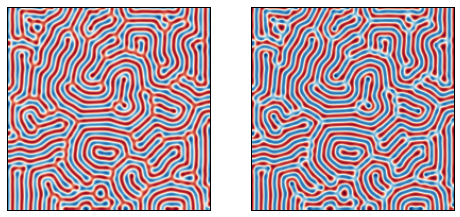

In [15]:
fig = plt.figure(figsize=(8,5))
plt.subplot(121)
plt.imshow(U, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);
plt.subplot(122)
plt.imshow(V, cmap = cm.RdBu)
plt.xticks([]), plt.yticks([]);


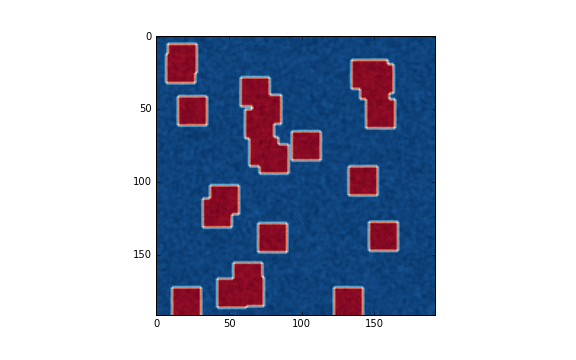

In [18]:
fig = plt.figure(figsize=(8,5), dpi=72)

img = plt.imshow(Uani[0,:,:],cmap = cm.RdBu)


def animate(data):
    img.set_array(data)
    return img,



anim = animation.FuncAnimation(fig, animate, frames=Uani, interval=100)
display_animation(anim, default_mode='once')


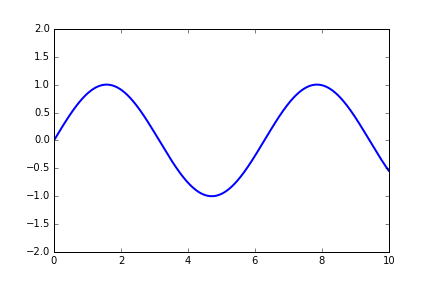
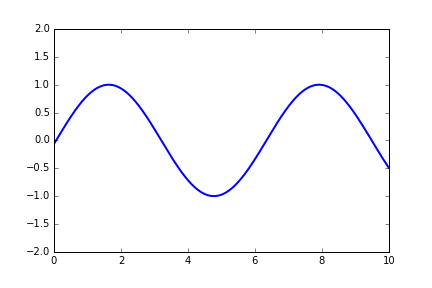
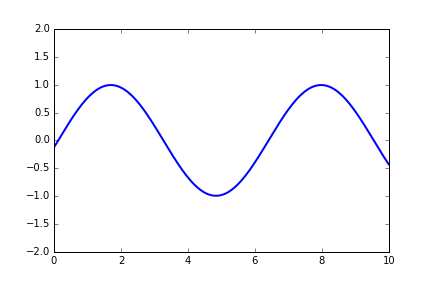
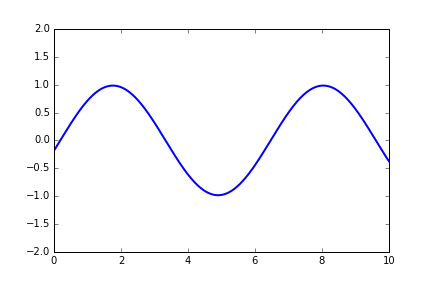
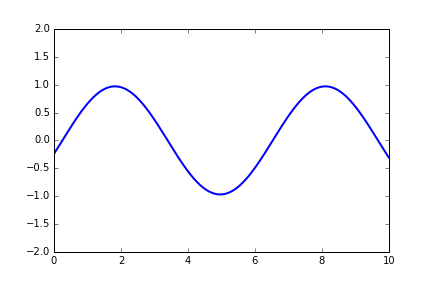
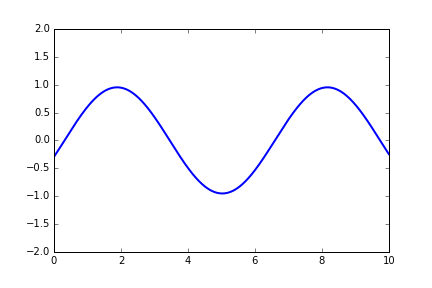
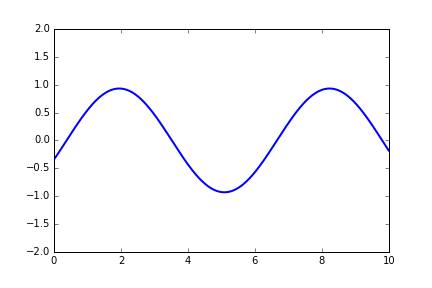
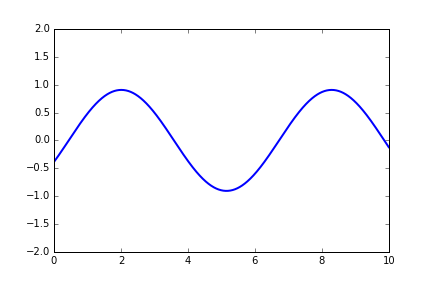
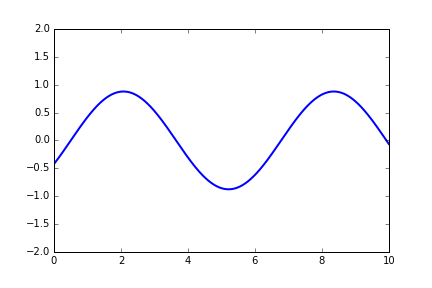
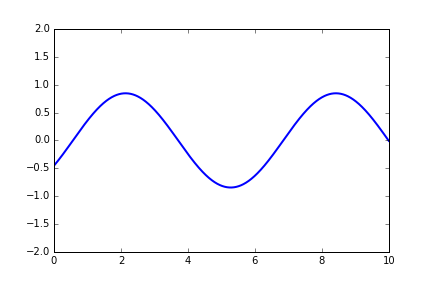
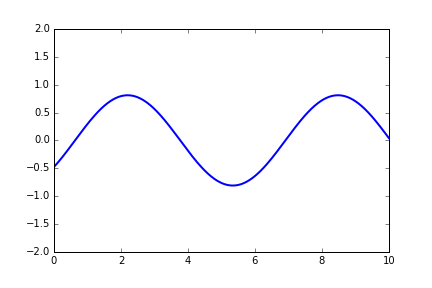
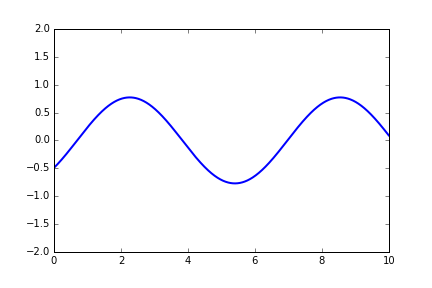
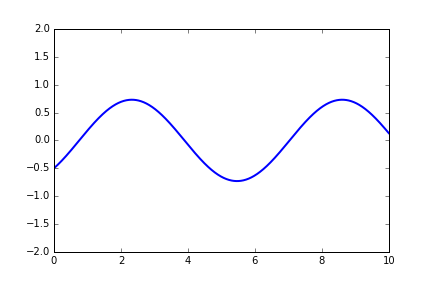
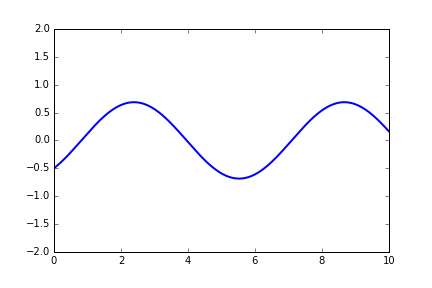
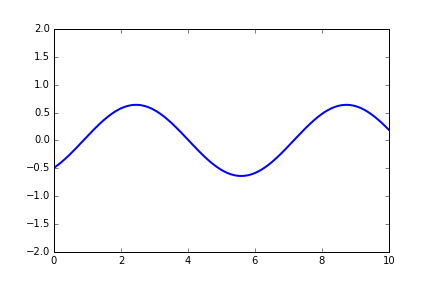
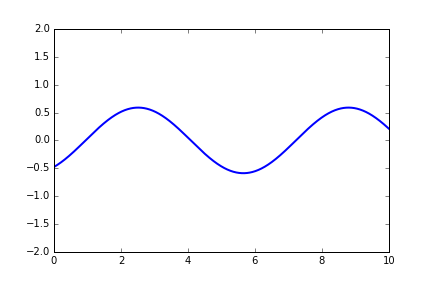
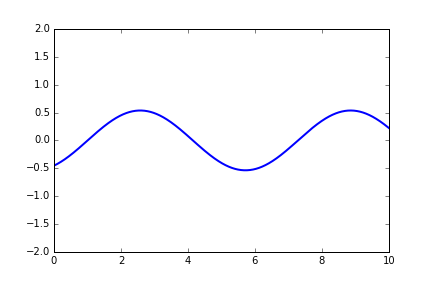
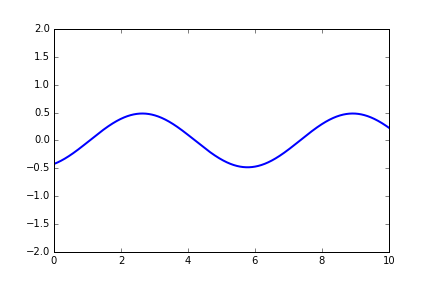
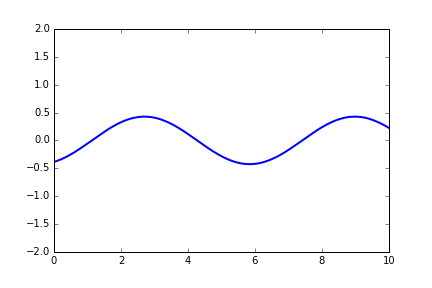
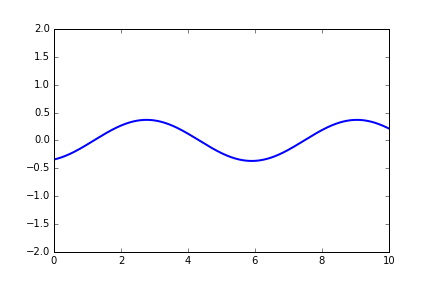
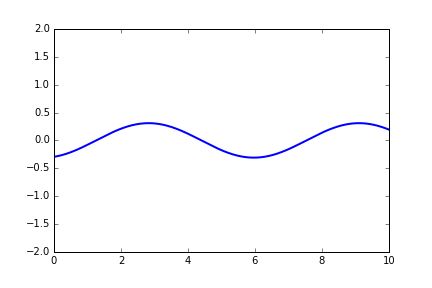
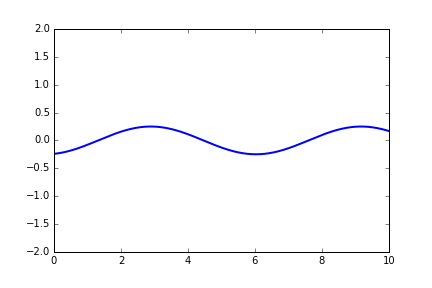
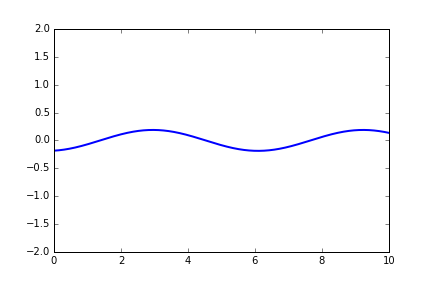
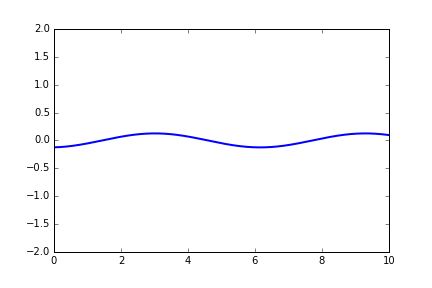
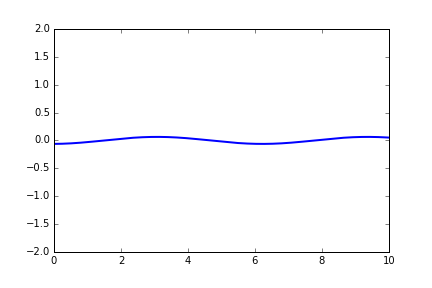
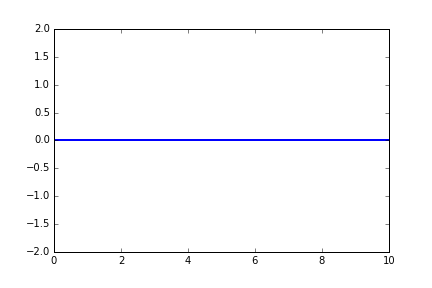
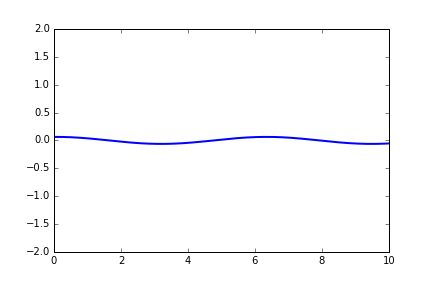
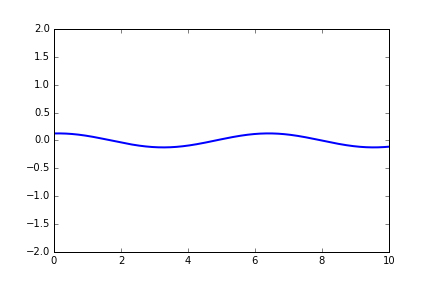
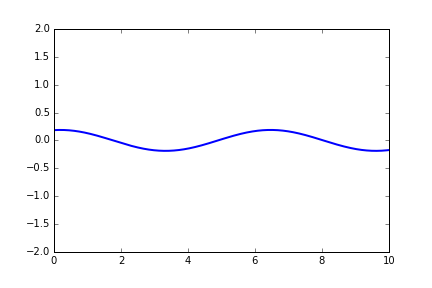
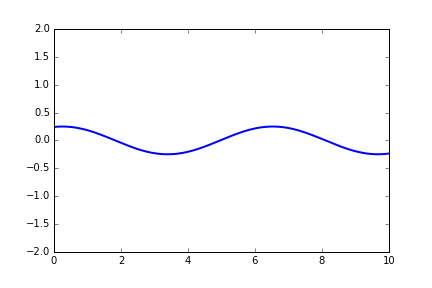
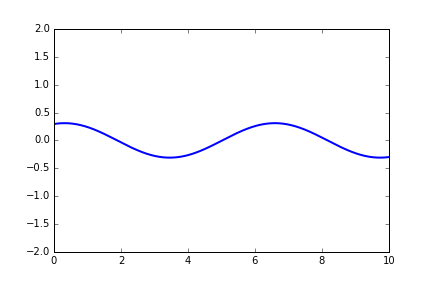
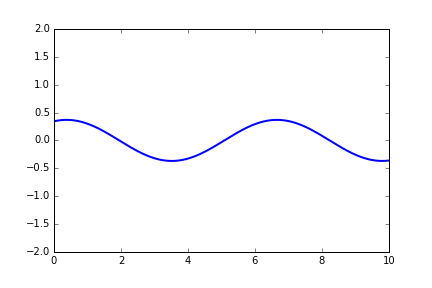
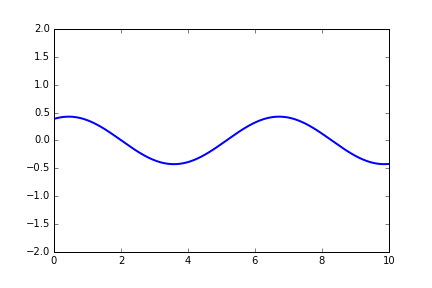
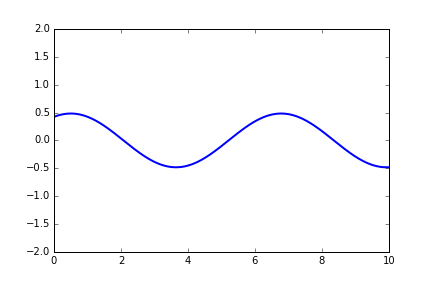
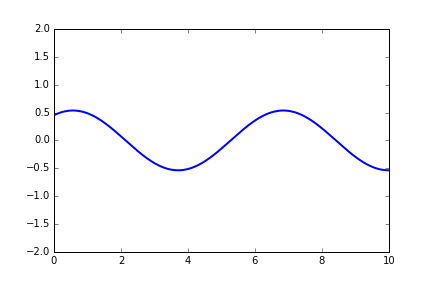
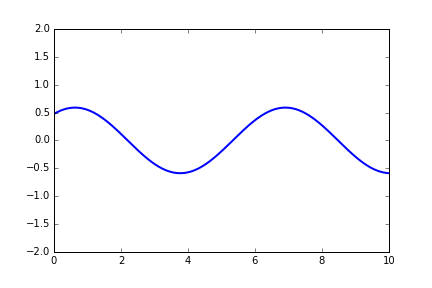
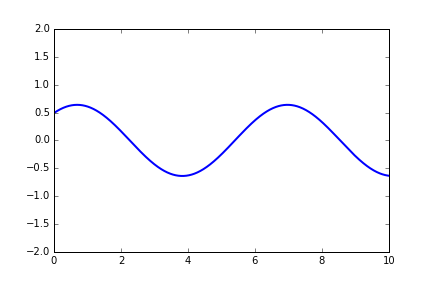
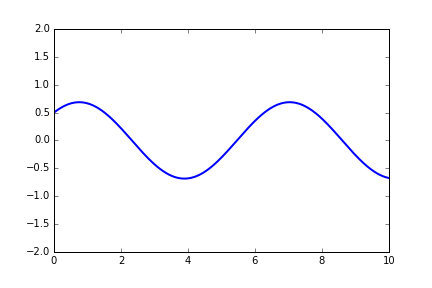
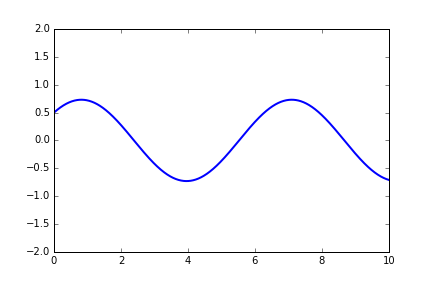
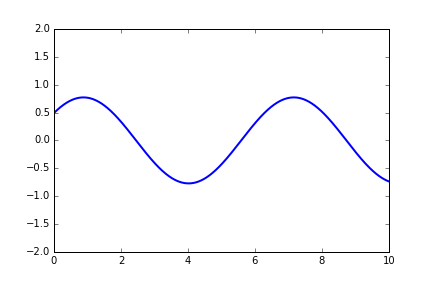
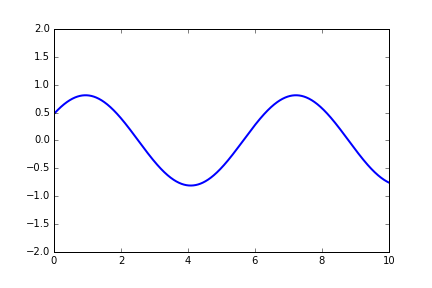
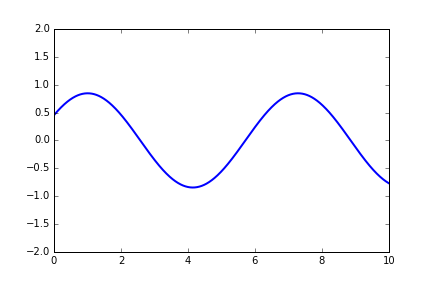
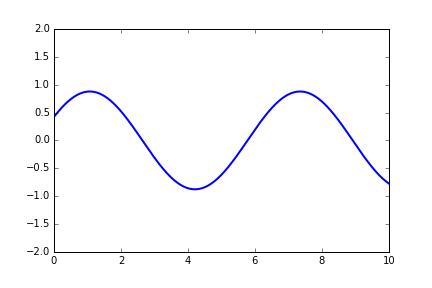
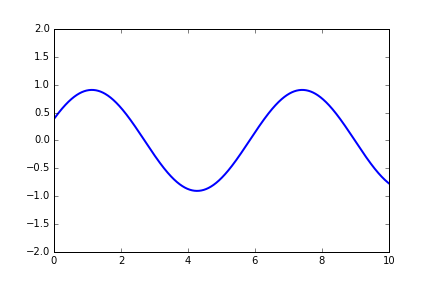
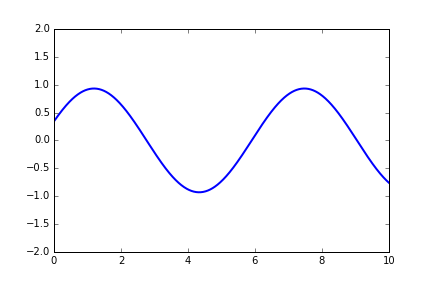
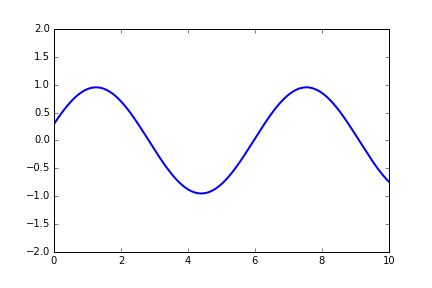
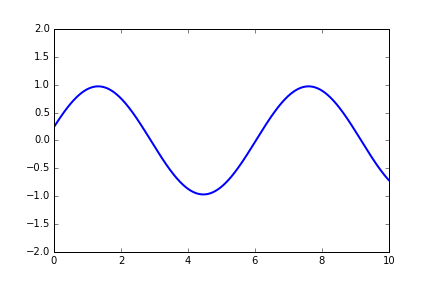
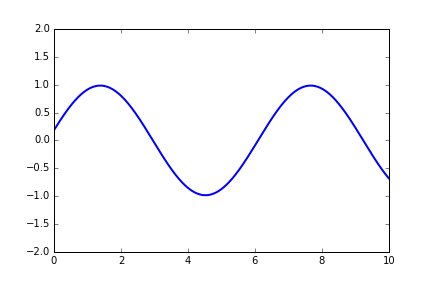
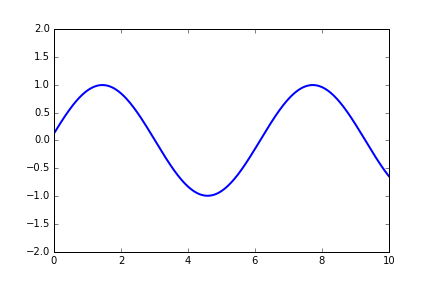
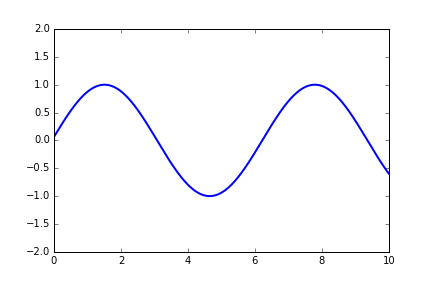
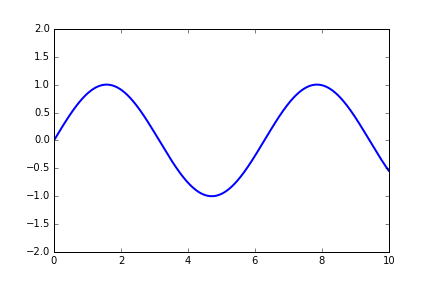
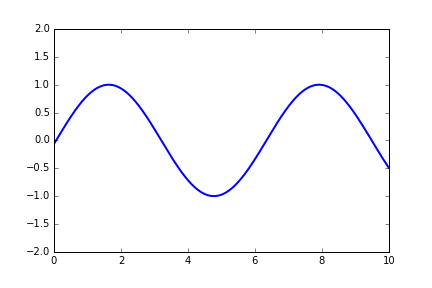
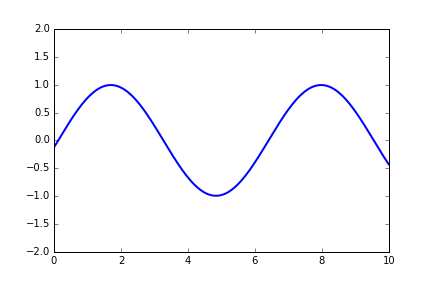
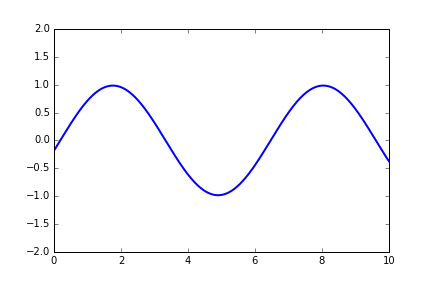
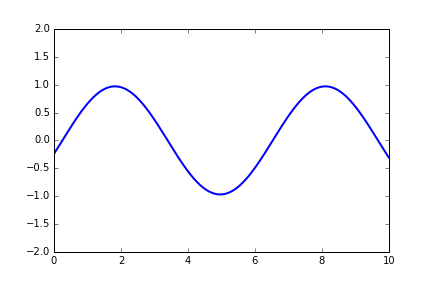
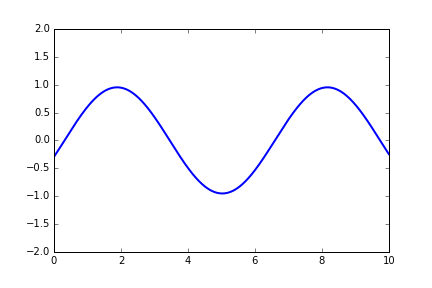
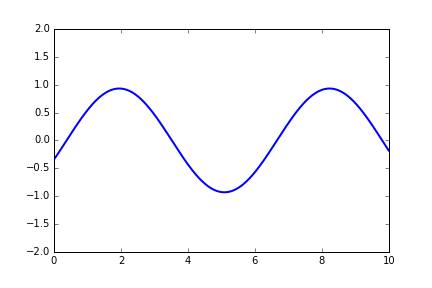
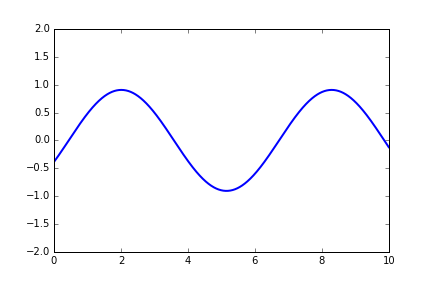
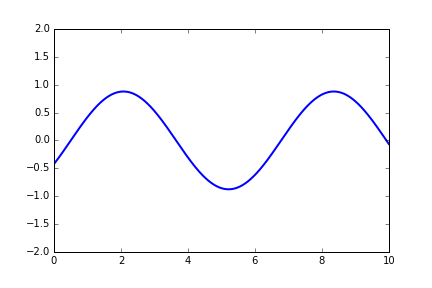
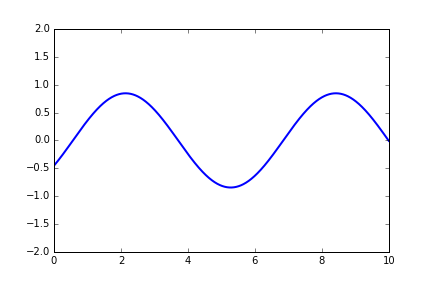
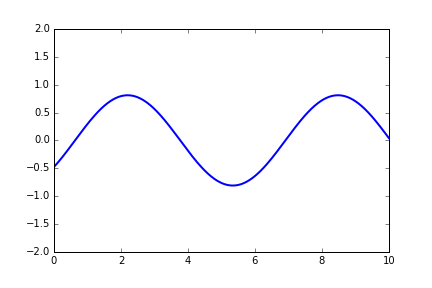
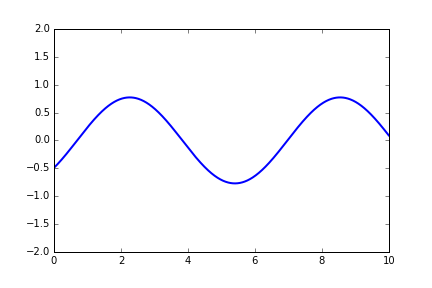
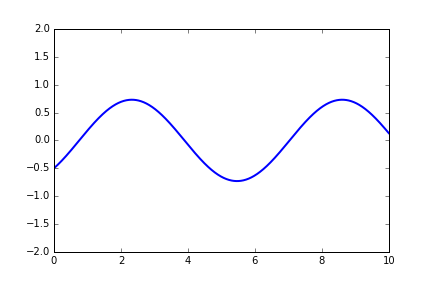
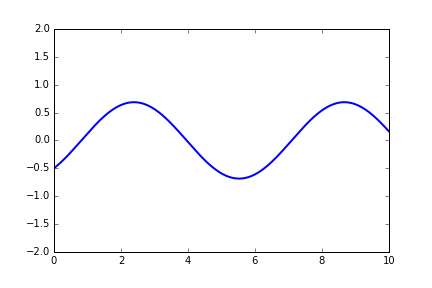
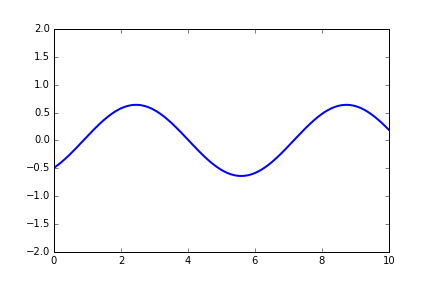
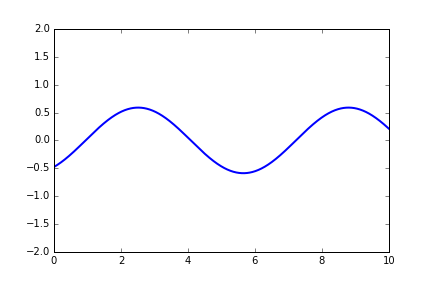
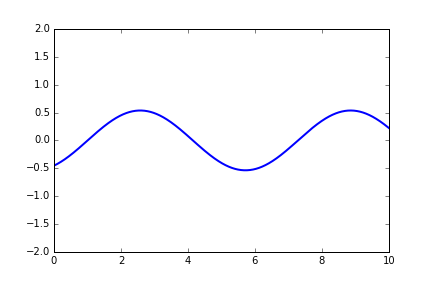
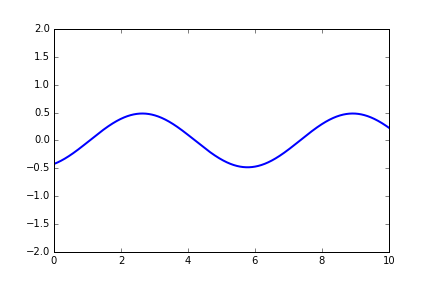
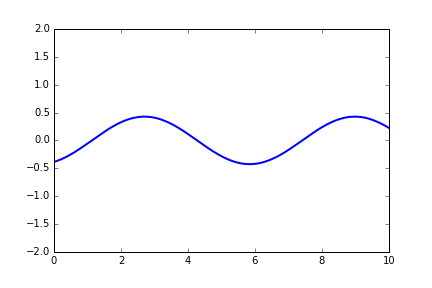
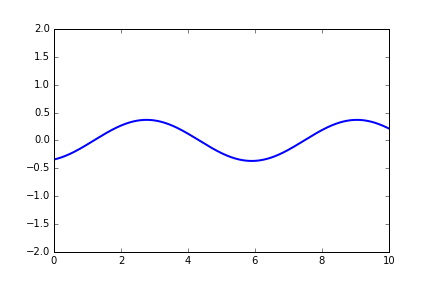
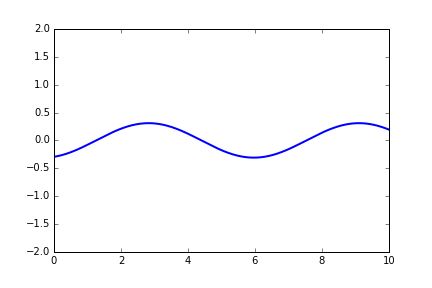
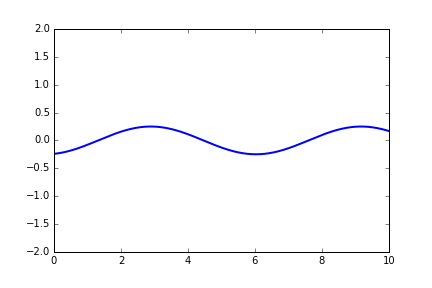
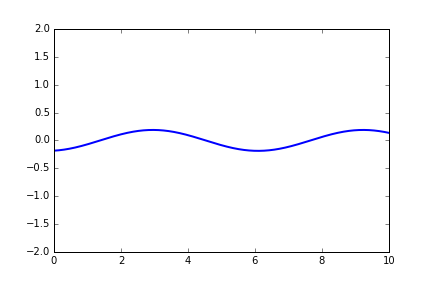
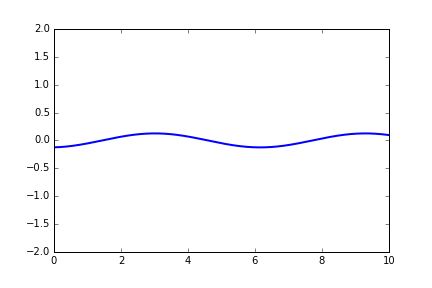
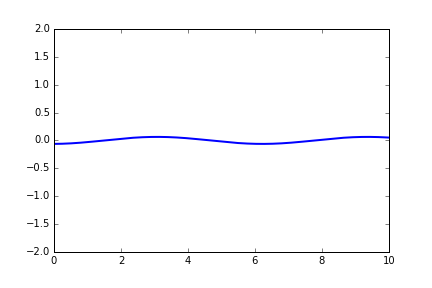
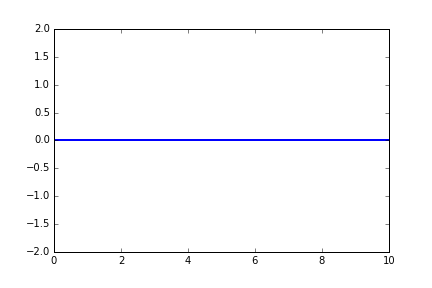
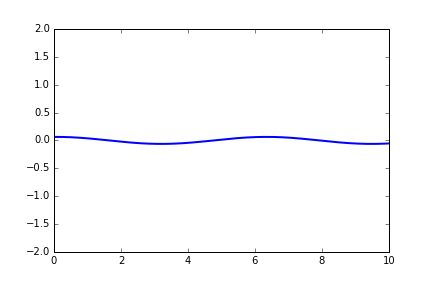
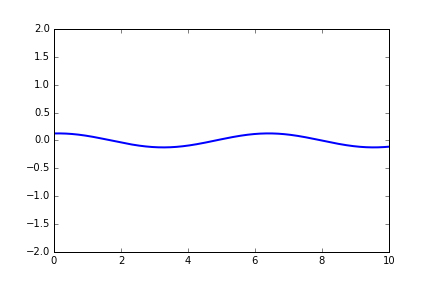
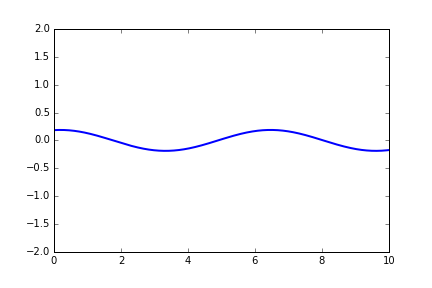
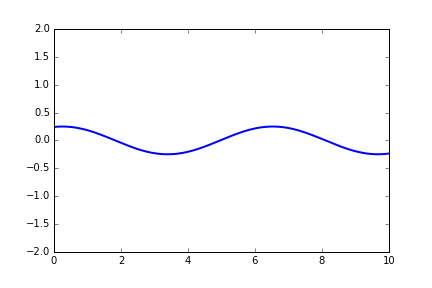
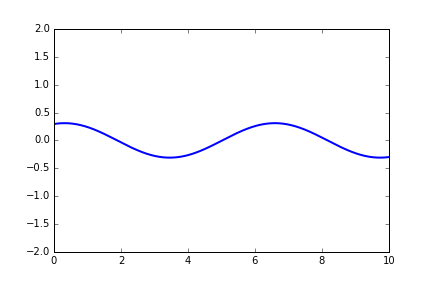
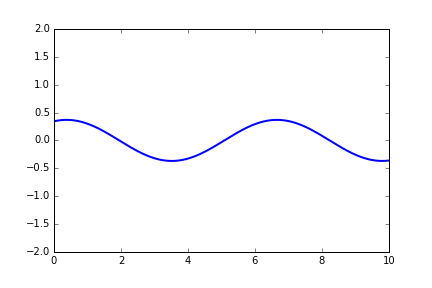
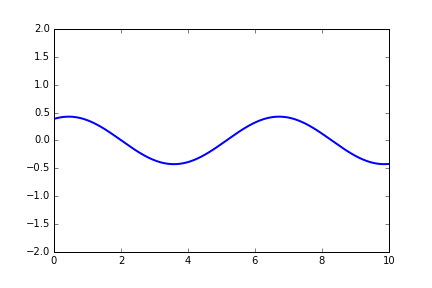
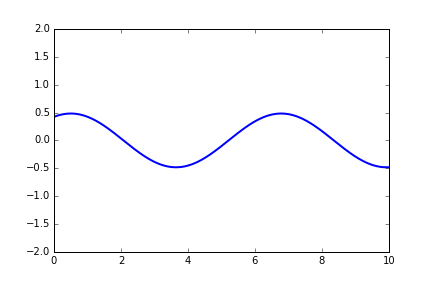
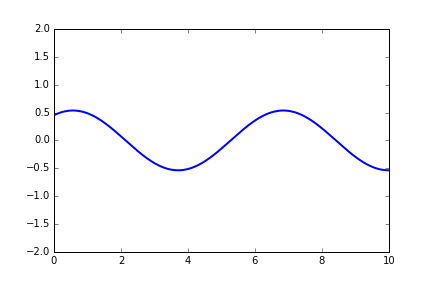
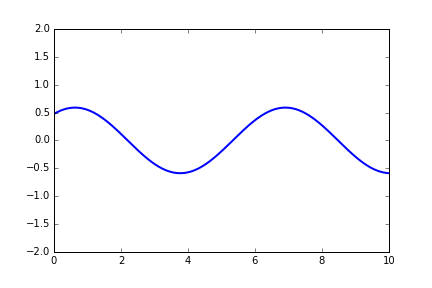
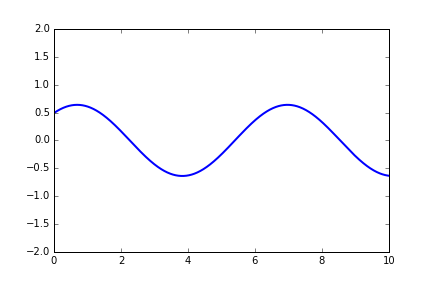
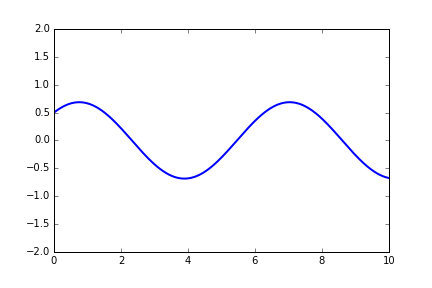
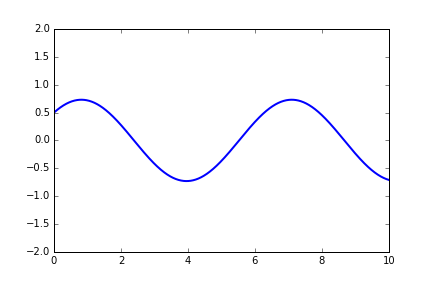
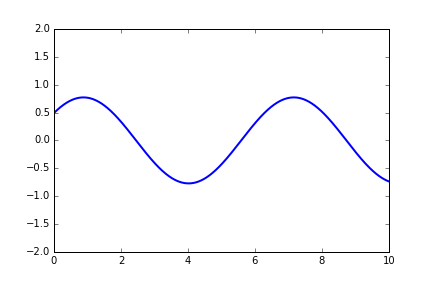
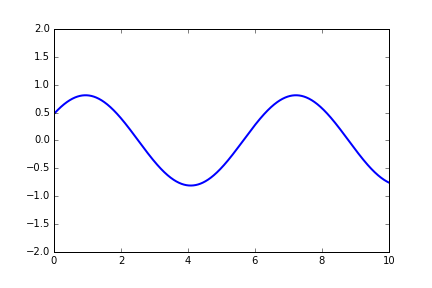
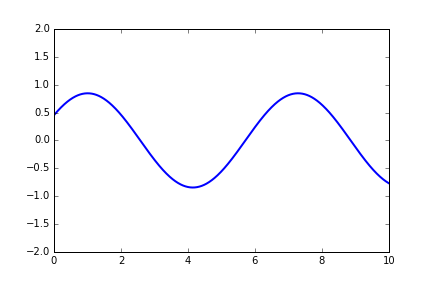
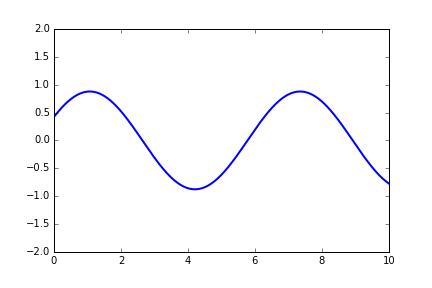
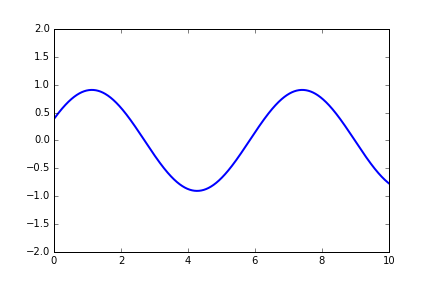
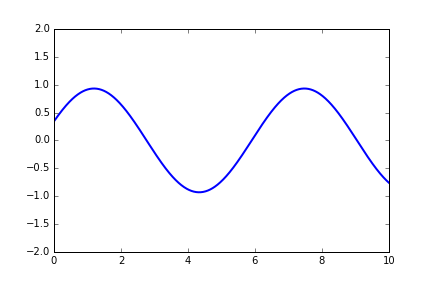
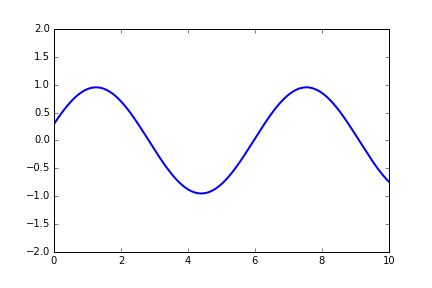
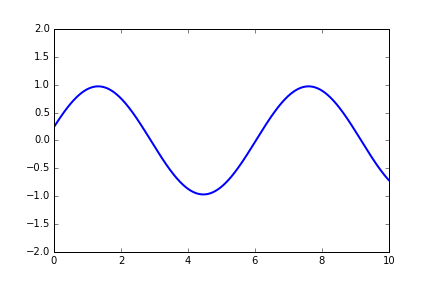
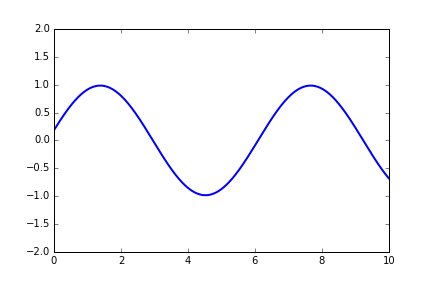
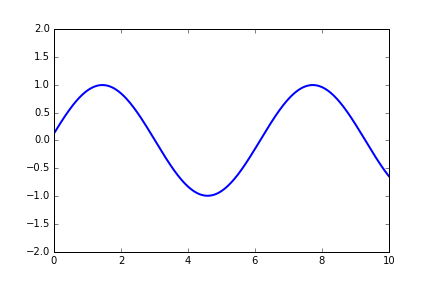
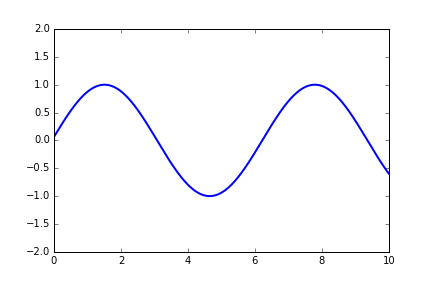

In [20]:
# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

# create a simple animation
fig = plt.figure()
ax = plt.axes(xlim=(0, 10), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = numpy.linspace(0, 10, 1000)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, numpy.cos(i * 0.02 * numpy.pi) * numpy.sin(x - i * 0.02 * numpy.pi))
    return line,

animation.FuncAnimation(fig, animate, init_func=init,
                        frames=100, interval=20, blit=True)